## Network Analysis
### 1.1 Centrality Measures
Select 3 centrality measures to characterise nodes, aiming at identifying the most important nodes in 
the underground network. Give the definition of each of the measures (including their equation), put 
the measures into the context of the underground, and why they will allow you to find the stations that 
are most crucial for the functioning of the underground. Compute the measures for your nodes in the 
network, and give the results in a table for the first 10 ranked nodes for each of the 3 measures.  

In [12]:
# we will import all the necessary libraries
import pandas as pd
import numpy as np
import geopandas as gpd
import networkx as nx
import matplotlib.pyplot as plt
from matplotlib.pyplot import cm
import json
import re
from shapely.geometry import Point, LineString #this library is for manipulating geometric objects, and it is what geopandas uses to store geometries
from scipy.spatial import distance
import matplotlib.pyplot as plt
import pandas as pd
import networkx as nx
import numpy as np
from operator import itemgetter

import warnings
warnings.filterwarnings('ignore')

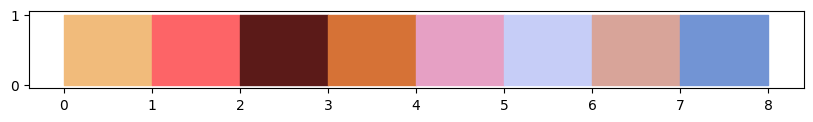

In [18]:
# Now import my favourite colour palette:
grandBudapest_colors = ["#F1BB7B", "#FD6467", "#5B1A18", "#D67236", "#E6A0C4", "#C6CDF7", "#D8A499", "#7294D4"]

# Now let's plot color pallette
plt.figure(figsize=(10, 1))
for i, color in enumerate(grandBudapest_colors):
    plt.fill_between([i, i + 1], 0, 1, color=color)


In [10]:
import sys
print(sys.version)

3.10.12 (main, Nov 20 2023, 15:14:05) [GCC 11.4.0]


1.1.1 Read the data, and explore the network:


In [4]:
# make multiple copies of the graph
london_graph = nx.read_graphml('london.graph')
london_graph3a = nx.read_graphml('london.graph')
london_graph3b = nx.read_graphml('london.graph')

In [14]:
# Take a look at our data
print("number of nodes: ",london_graph.number_of_nodes())
print("number of edges: ",london_graph.number_of_edges())

number of nodes:  401
number of edges:  467


In [17]:
for node in london_graph.nodes():
    london_graph.nodes[node]['coords'] = eval(london_graph.nodes[node]['coords'])

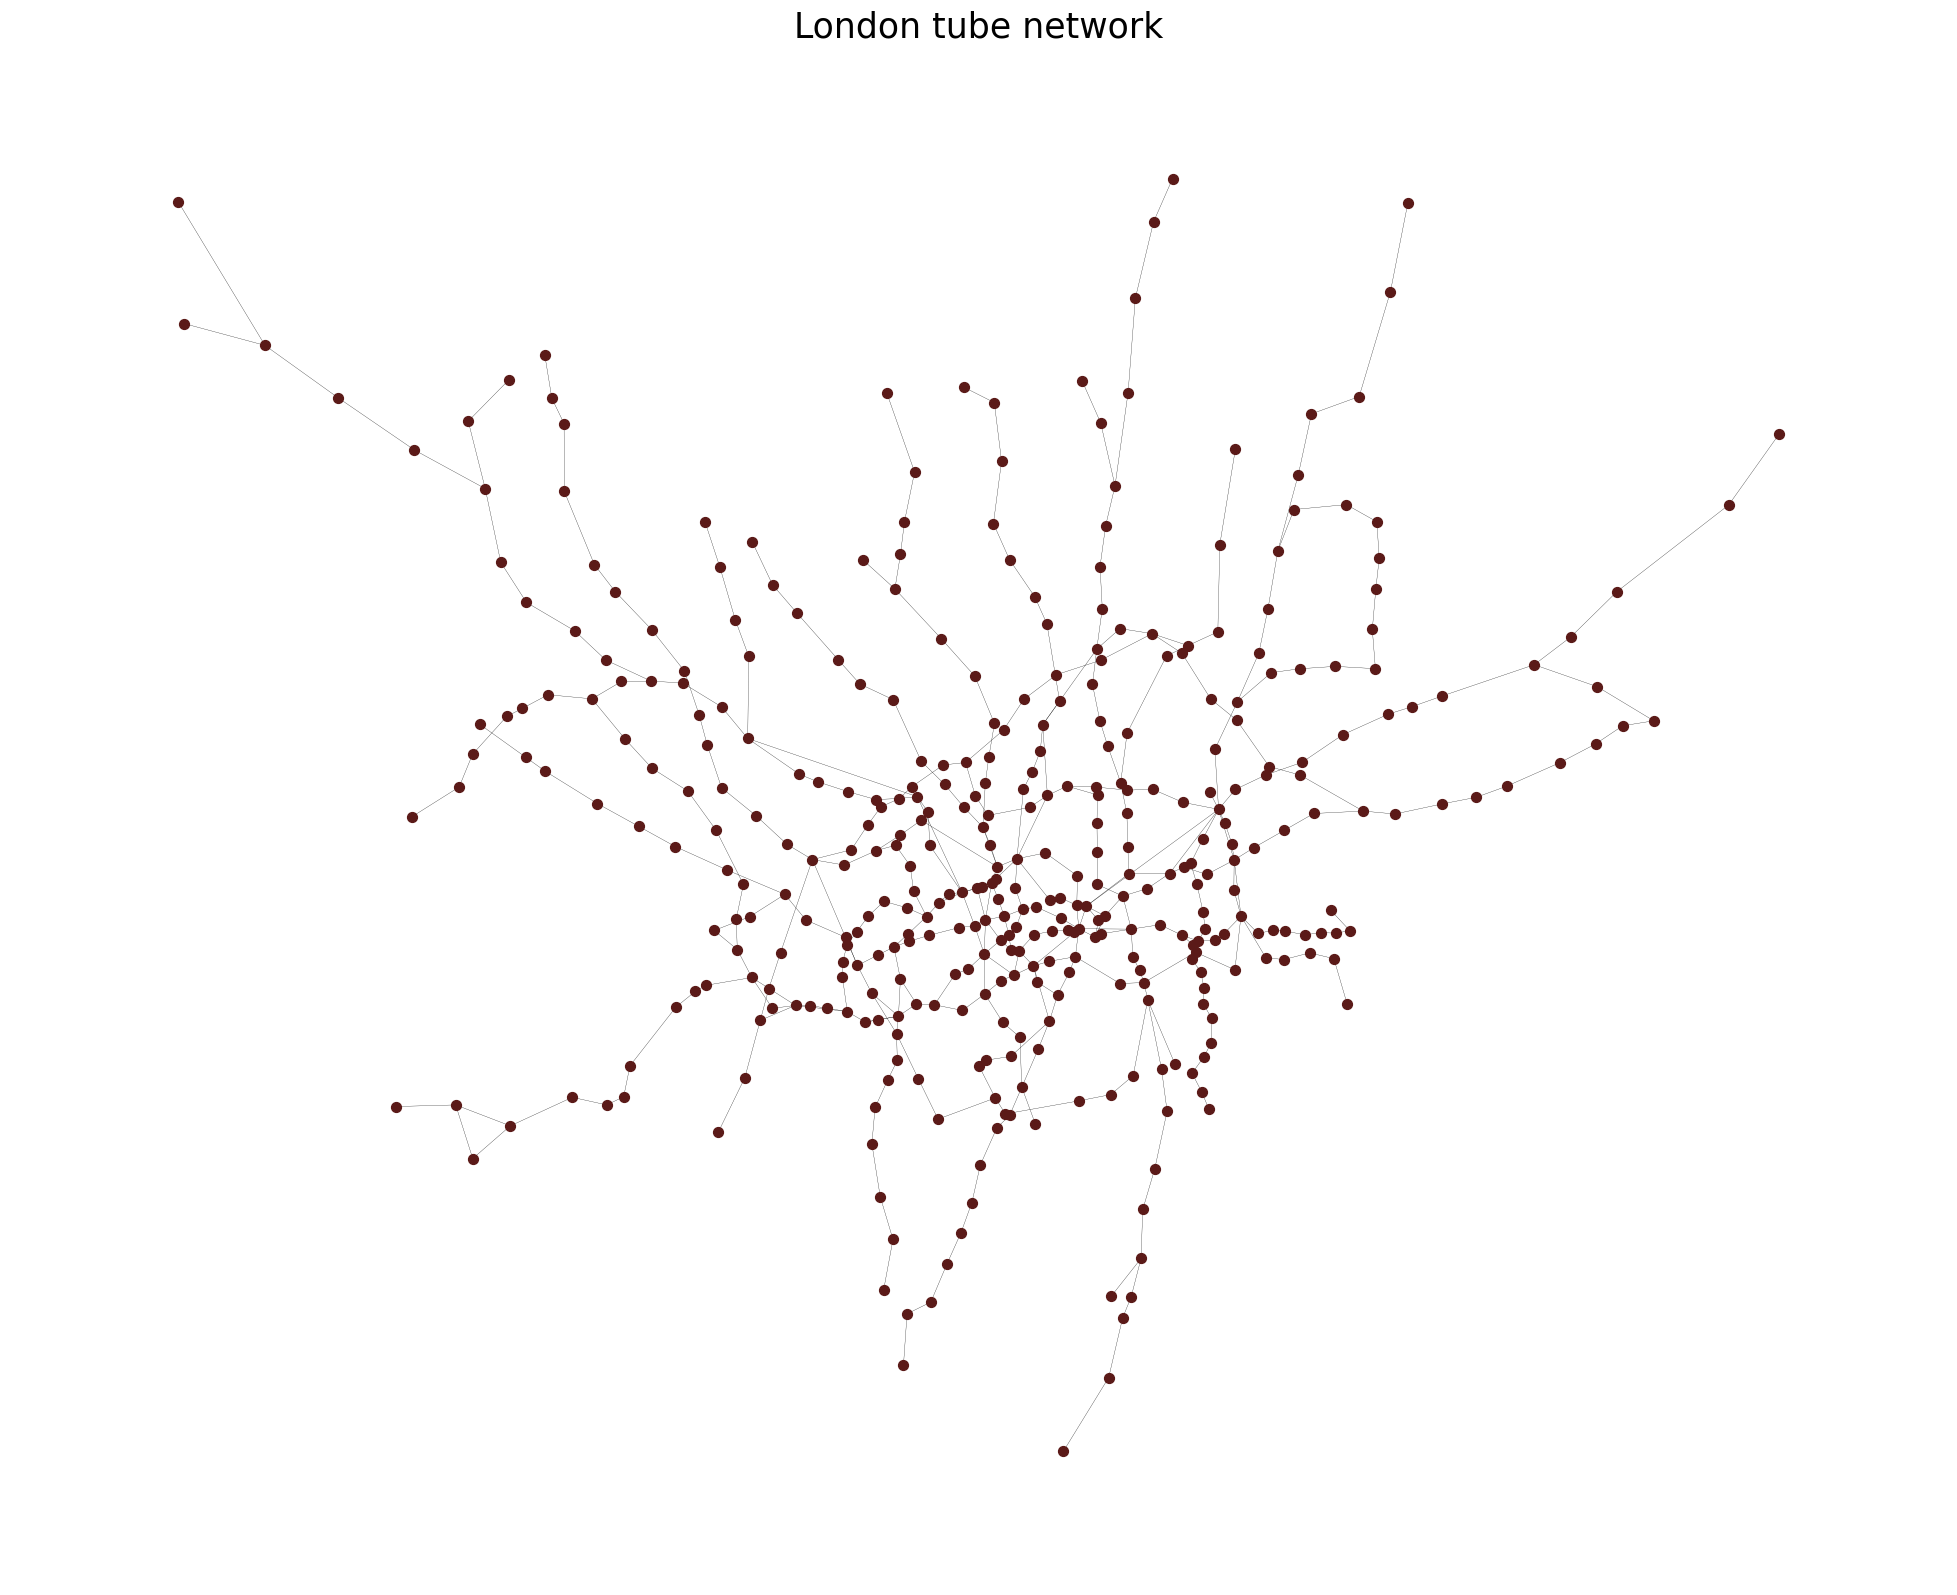

In [19]:
fig, ax = plt.subplots(figsize=(25,20))

node_labels = nx.get_node_attributes(london_graph, 'station_name')

pos = nx.get_node_attributes(london_graph, 'coords')

nx.draw_networkx_nodes(london_graph, pos, node_size=60, node_color=grandBudapest_colors[2])
nx.draw_networkx_edges(london_graph, pos, arrows=False, width=0.2)
nx.draw_networkx_labels(london_graph, pos, node_labels, font_size=10, font_color=grandBudapest_colors[7])

plt.title("London tube network",fontsize=25)
plt.axis("off")
plt.show()

In [20]:
# To check node attributes:
list(london_graph.nodes(data = True))[0]

('Wembley Park',
 {'coords': (519316.5590174915, 186389.32981656672), 'degree': 0.01})

In [24]:
network_df = nx.to_pandas_edgelist(london_graph)

In [25]:
network_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 467 entries, 0 to 466
Data columns (total 5 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   source     467 non-null    object 
 1   target     467 non-null    object 
 2   length     467 non-null    float64
 3   flows      467 non-null    int64  
 4   line_name  467 non-null    object 
dtypes: float64(1), int64(1), object(3)
memory usage: 18.4+ KB


In [26]:
# Top 10 degree centrality
degree_centrality = pd.DataFrame(nx.degree(london_graph), columns=['degree centrality', 'value']) \
                      .sort_values(by='value', ascending=False) \
                      .iloc[:10]
degree_centrality

,degree(nonseq),value
5,Stratford,9
50,Bank and Monument,8
229,King's Cross St. Pancras,7
18,Baker Street,7
180,Earl's Court,6
45,Oxford Circus,6
51,Liverpool Street,6
14,Waterloo,6
16,Green Park,6
7,Canning Town,6


In [28]:
# Top 10 closeness centrality
closeness_centrality = pd.DataFrame.from_dict(nx.closeness_centrality(london_graph, distance='distance'), 
                                               orient='index', columns=['value']) \
                         .rename_axis('closeness(nonseq)').reset_index() \
                         .sort_values(by='value', ascending=False) \
                         .iloc[:10]
closeness_centrality

,closeness(nonseq),value
16,Green Park,0.114778
50,Bank and Monument,0.113572
229,King's Cross St. Pancras,0.113443
15,Westminster,0.112549
14,Waterloo,0.112265
45,Oxford Circus,0.111204
17,Bond Street,0.110988
230,Farringdon,0.110742
312,Angel,0.110742
232,Moorgate,0.110314


In [29]:
# Top 10 betweeness centrality
betweenness_centrality = pd.DataFrame.from_dict(nx.betweenness_centrality(london_graph), 
                                                 orient='index', columns=['value']) \
                            .rename_axis('betweenness(nonseq)').reset_index() \
                            .sort_values(by='value', ascending=False) \
                            .iloc[:10]
betweenness_centrality

,betweenness(nonseq),value
5,Stratford,0.297846
50,Bank and Monument,0.290489
51,Liverpool Street,0.270807
229,King's Cross St. Pancras,0.255307
14,Waterloo,0.243921
16,Green Park,0.215835
150,Euston,0.208324
15,Westminster,0.203335
18,Baker Street,0.191568
21,Finchley Road,0.165085


In [21]:
#since coords tuples are stored as string, need to convert them back to tuples using eval()
for node in london_graph.nodes():
    london_graph.nodes[node]['coords'] = eval(london_graph.nodes[node]['coords'])
    

In [22]:
# To check edges attributes:
list(london_graph.edges(data = True))[0]

('910GCAMHTH',
 '910GBTHNLGR',
 {'length': 1076.0822006959384,
  'name': 'London Overground',
  'line_id': 'LeaValleyLine1',
  'station_1_': 'Cambridge Heath',
  'station_2_': 'Bethnal Green'})

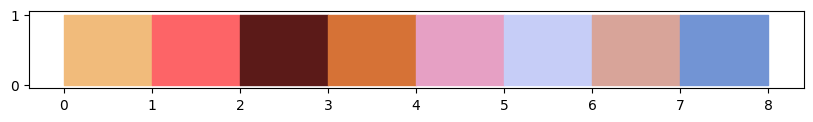

In [7]:
# Draw the network
plt.figure(figsize=(40, 50))
node_labels = nx.get_node_attributes(london_graph, 'station_name')
#nx.draw_networkx_labels(london_graph, pos, node_labels, font_size=10, font_color='black')
pos = nx.spring_layout(london_graph, seed=42)  # For consistent layout
nx.draw_networkx_nodes(london_graph, pos, node_size= 20, node_color = grandBudapest_colors[3])
nx.draw_networkx_edges(london_graph, pos, alpha=0.8, edge_color=grandBudapest_colors[5], 
        width=0.8)
# Draw node labels
nx.draw_networkx_labels(london_graph, pos, node_labels, font_size=10, font_color='black')
plt.title("London Underground Network")
plt.axis('off')  # Turn off the axis
plt.show()


NameError: name 'grandBudapest_colors' is not defined

<Figure size 4000x5000 with 0 Axes>

In [8]:
 #We can print the dataframe from the shapefile to check the data
df = nx.to_pandas_edgelist(london_graph)
df[0:20]

,source,target,length,flows,line_name
0,Wembley Park,Kingsbury,2916.771558,12356,Jubilee
1,Wembley Park,Neasden,2353.165938,6744,Jubilee
2,Wembley Park,Preston Road,1419.735166,36601,Metropolitan
3,Wembley Park,Finchley Road,7266.373927,55216,Metropolitan
4,Kingsbury,Queensbury,1245.995234,9419,Jubilee
5,Queensbury,Canons Park,1693.307343,6385,Jubilee
6,Canons Park,Stanmore,1419.669476,3624,Jubilee
7,Stratford,West Ham,1673.509515,91801,Jubilee
8,Stratford,Mile End,2805.001392,12010,Central
9,Stratford,Leyton,2131.342926,56082,Central


In [52]:
#if want to know what is the maximum distance between stations
max_dist=max({weight for e1, e2, weight in london_graph.edges(data='length')})

#This distance in given in meters
#if want to know the name of stations which are further away from each other
furthest_stat = [(d['station_1_'],d['station_2_']) for  u,v,d in london_graph.edges(data=True) if d['length'] == max_dist]

#if want to know to which stations Baker Street is directly connected to
Baker_Street = [(d['station_1_'],d['station_2_']) for  u,v,d in london_graph.edges(data=True) if d['station_1_'] == 'Baker Street'or d['station_2_'] == 'Baker Street']
(max_dist,furthest_stat,Baker_Street)

(7113.318903338077,
 [('Wembley Park', 'Finchley Road')],
 [('Edgware Road', 'Baker Street'),
  ('Baker Street', 'Great Portland Street'),
  ('Baker Street', 'Bond Street'),
  ('Baker Street', "St. John's Wood"),
  ('Baker Street', 'Finchley Road'),
  ('Baker Street', 'Marylebone'),
  ('Baker Street', "Regent's Park")])

1.1.2 Centrality Measures
1) Degree Centrality

In [9]:
degree_centrality = nx.degree_centrality(london_graph)
nx.set_node_attributes(london_graph,dict(degree_centrality),'degree')
# To dataframe using the nodes as the index
df = pd.DataFrame(index=london_graph.nodes())
df['station_name'] = pd.Series(nx.get_node_attributes(london_graph, 'station_name'))
df['degree'] = pd.Series(nx.get_node_attributes(london_graph, 'degree'))

df_sorted = df.sort_values(["degree"], ascending=False)
df_sorted[0:10]

,station_name,degree
Stratford,NaN,0.0225
Bank and Monument,NaN,0.0200
King's Cross St. Pancras,NaN,0.0175
Baker Street,NaN,0.0175
Earl's Court,NaN,0.0150
Oxford Circus,NaN,0.0150
Liverpool Street,NaN,0.0150
Waterloo,NaN,0.0150
Green Park,NaN,0.0150
Canning Town,NaN,0.0150


In [28]:
df_sorted[0:20]

,station_name,degree
940GZZLUKSX,King's Cross St. Pancras,0.016018
940GZZLUBST,Baker Street,0.016018
940GZZLUOXC,Oxford Circus,0.013730
940GZZLUGPK,Green Park,0.013730
940GZZLUBNK,Bank,0.013730
940GZZLUECT,Earl's Court,0.013730
940GZZLUWLO,Waterloo,0.013730
940GZZLUTNG,Turnham Green,0.011442
940GZZDLCGT,Canning Town (DLR),0.011442
940GZZLULVT,Liverpool Street,0.011442


2) Betweeness centrality


In [8]:
# Recompute the centrality measures

betweenness_centrality = nx.betweenness_centrality(london_graph)
closeness_centrality = nx.closeness_centrality(london_graph)

# Sort and get the top 10 nodes for each centrality measure
sorted_degree = sorted(degree_centrality.items(), key=lambda x: x[1], reverse=True)[:10]
sorted_betweenness = sorted(betweenness_centrality.items(), key=lambda x: x[1], reverse=True)[:10]
sorted_closeness = sorted(closeness_centrality.items(), key=lambda x: x[1], reverse=True)[:10]

#

#(sorted_degree, sorted_betweenness, sorted_closeness)


In [12]:
london_graph

In [9]:
pd.DataFrame.from_dict(sorted_degree,columns=['degree centrality'],orient='index')
pd.DataFrame.from_dict(sorted_betweenness,columns=['betweeness centrality'],orient='index')
pd.DataFrame.from_dict(sorted_closeness,columns=['closeness centrality'],orient='index')

AttributeError: 'list' object has no attribute 'values'

Delta Centrality

In [ ]:
# Compute initial betweenness centrality
initial_betweenness = nx.betweenness_centrality(G)

# Initialize a dictionary to store delta centrality
delta_centrality = {}

# Iterate over all nodes to compute delta centrality
for node in G.nodes():
    # Create a copy of the graph without the current node
    G_copy = copy.deepcopy(G)
    G_copy.remove_node(node)
    
    # Recompute betweenness centrality without the node
    new_betweenness = nx.betweenness_centrality(G_copy)
    
    # Calculate the difference and store it
    delta_centrality[node] = sum(abs(initial_betweenness[n] - new_betweenness.get(n, 0)) for n in initial_betweenness)

# Sort nodes by their delta centrality
sorted_delta_centrality = sorted(delta_centrality.items(), key=lambda x: x[1], reverse=True)

Delta centrality

In [ ]:
import networkx as nx
import copy

# Load your network
G = nx.read_graphml('path_to_your_graphml_file.graphml')

# Compute initial betweenness centrality
initial_betweenness = nx.betweenness_centrality(G)

# Initialize a dictionary to store delta centrality
delta_centrality = {}

# Iterate over all nodes to compute delta centrality
for node in G.nodes():
    # Create a copy of the graph without the current node
    G_copy = copy.deepcopy(G)
    G_copy.remove_node(node)
    
    # Recompute betweenness centrality without the node
    new_betweenness = nx.betweenness_centrality(G_copy)
    
    # Calculate the difference and store it
    delta_centrality[node] = sum(abs(initial_betweenness[n] - new_betweenness.get(n, 0)) for n in initial_betweenness)

# Sort nodes by their delta centrality
sorted_delta_centrality = sorted(delta_centrality.items(), key=lambda x: x[1], reverse=True)


Find 2 different measures to evaluate the impact of the node removal on the network. These need to 
be global measures referring to the whole network and not to specific nodes or links. Explain whether 
these two measures are specific to the London underground, or whether they could also be used to 
evaluate the resilience of any other network.  

For each of the centrality measures selected in I.1. remove at least 10 nodes following two different 
strategies. A) Non-sequential removal: using the table created in I.1. remove 1 node at a time 
following the rank in the table, i.e. from the most important one to the 10

th most important one. After 
each removal, evaluate the impact of the removal using your two measures in I.2. and proceed until 
you have removed at least 10 nodes. B) Sequential: remove the highest ranked node and evaluate the 
impact using the 2 measures. After removal, re-compute the centrality measure. Remove the highest 
ranked node in the new network and evaluate the impact. Continue until removing at least 10 nodes. 

Report the results of the 2 strategies in one plot, and critically discuss the following: which centrality 
measure reflects better the importance of a station for the functioning of the underground, which 
strategy is more effective at studying resilience, and which impact measure is better at assessing the 
damage after node removal.  